In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\kkliv\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\kkliv\\AppData\\Local\\Temp\\pip-install-fg3o6y33\\tensorflow-gpu_63dbfb59a3e44450b021516469ac35b6\\setup.py'"'"'; __file__='"'"'C:\\Users\\kkliv\\AppData\\Local\\Temp\\pip-install-fg3o6y33\\tensorflow-gpu_63dbfb59a3e44450b021516469ac35b6\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\kkliv\AppData\Local\Temp\pip-wheel-c0fk5orf'
       cwd: C:\Users\kkliv\AppData\Local\Temp\pip-install-fg3o6y33\tensorflow-gpu_63dbfb59a3e44450b021516469ac35b6\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Us

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.0.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpor

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

C:\Users\kkliv\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


tf.Tensor(392.9262, shape=(), dtype=float32)


In [5]:
!pip install opencv-python matplotlib

In [6]:
import cv2
import imghdr
import os

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [58]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
tf.data.Dataset??

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

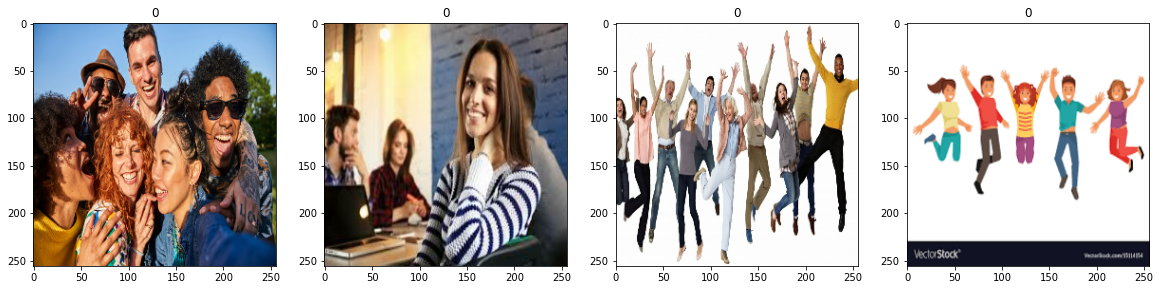

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y)) #scaling the data

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.85882354, 0.8509804 , 0.85490197],
          [0.85882354, 0.8509804 , 0.85490197],
          [0.85882354, 0.8509804 , 0.85490197],
          ...,
          [0.94509804, 0.9372549 , 0.9411765 ],
          [0.94509804, 0.9372549 , 0.9411765 ],
          [0.94509804, 0.9372549 , 0.9411765 ]],
 
         [[0.85882354, 0.8509804 , 0.85490197],
          [0.85882354, 0.8509804 , 0.85490197],
          [0.85882354, 0.8509804 , 0.85490197],
          ...,
          [0.94509804, 0.9372549 , 0.9411765 ],
          [0.94509804, 0.9372549 , 0.9411765 ],
          [0.94509804, 0.9372549 , 0.9411765 ]],
 
         [[0.85882354, 0.8509804 , 0.85490197],
          [0.85882354, 0.8509804 , 0.85490197],
          [0.85882354, 0.8509804 , 0.85490197],
          ...,
          [0.94509804, 0.9372549 , 0.9411765 ],
          [0.94509804, 0.9372549 , 0.9411765 ],
          [0.94509804, 0.9372549 , 0.9411765 ]],
 
         ...,
 
         [[0.2530331 , 0.4020527 , 0.48440564],
          [0.26348

In [18]:
#Splitting the data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train_size

7

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
# Building the Model

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [30]:
# Training the data

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 126s 13s/step - loss: 0.9981 - accuracy: 0.5045 - val_loss: 0.6752 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 66s 9s/step - loss: 0.6855 - accuracy: 0.6295 - val_loss: 0.6651 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 39s 5s/step - loss: 0.6640 - accuracy: 0.7009 - val_loss: 0.6398 - val_accuracy: 0.5625
Epoch 4/20
7/7 [==============================] - 33s 4s/step - loss: 0.5696 - accuracy: 0.7054 - val_loss: 0.5496 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 36s 5s/step - loss: 0.5174 - accuracy: 0.8661 - val_loss: 0.4138 - val_accuracy: 0.7812
Epoch 6/20
7/7 [==============================] - 32s 4s/step - loss: 0.4279 - accuracy: 0.8080 - val_loss: 0.4638 - val_accuracy: 0.7969
Epoch 7/20
7/7 [==============================] - 33s 4s/step - loss: 0.3569 - accuracy: 0.8304 - val_loss: 0.2740 - val_accuracy: 0.8281
Epoch 8/20
7/7 [================

In [34]:
# Plot Performance

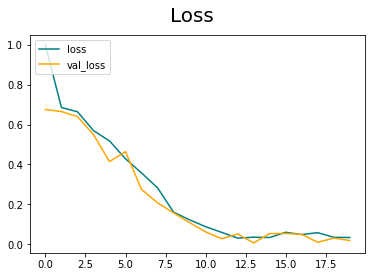

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

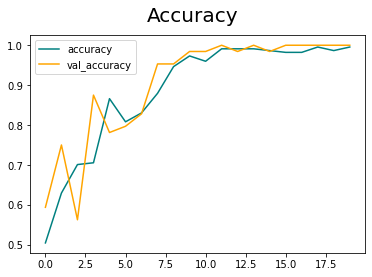

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [37]:
# Evaluate

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 2s 2s/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [42]:
# Testing

In [43]:
import cv2

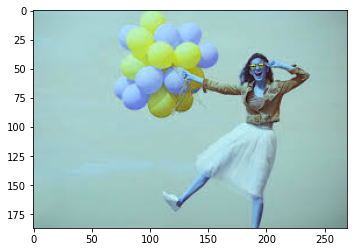

In [46]:
img = cv2.imread('images33.jpg')
plt.imshow(img)
plt.show()

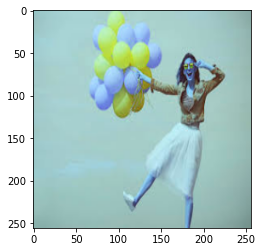

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 109ms/step


In [49]:
yhat

array([[0.05910262]], dtype=float32)

In [50]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [51]:
# saving the model

In [52]:
from tensorflow.keras.models import load_model

In [55]:
model.save(os.path.join('models','imageclassifiernewversionlive.h5'))

In [56]:
new_model = load_model(os.path.join('models','imageclassifiernewversionlive.h5'))

In [57]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 393ms/step


array([[0.05910262]], dtype=float32)